In [1]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [162]:
Data = pd.DataFrame.from_csv("modifiedData.csv")
Data

,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,hum_office,...,Pressure,hum_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Num_sec_midnight,Day_Status,week_status
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200,Monday,weekday
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800,Monday,weekday
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400,Monday,weekday
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,63000,Monday,weekday
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600,Monday,weekday
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484,64200,Monday,weekday
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,...,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763,64800,Monday,weekday
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890,65400,Monday,weekday
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702,66000,Monday,weekday


# Converting string to numeric data using 1 hot encoding

In [163]:
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(Data['week_status'])
int_encoded_day = label_encoder.fit_transform(Data['Day_Status'])
onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
int_encoded_day = int_encoded_day.reshape(len(int_encoded_day), 1)
newWeek = onehot_encoder.fit_transform(int_encoded)
newDay = onehot_encoder.fit_transform(int_encoded_day)
# new2 = label_encoder.inverse_transform([argmax(new[len(new)-1, :])])
Data.drop(['week_status', 'Day_Status'], axis=1, inplace=True)
Data['Friday'] = pd.Series(newDay[:,0], index=Data.index)
Data['Monday'] = pd.Series(newDay[:,1], index=Data.index)
Data['Saturday'] = pd.Series(newDay[:,2], index=Data.index)
Data['Sunday'] = pd.Series(newDay[:,3], index=Data.index)
Data['Thursday'] = pd.Series(newDay[:,4], index=Data.index)
Data['Tuesday'] = pd.Series(newDay[:,5], index=Data.index)
Data['Wednesday'] = pd.Series(newDay[:,6], index=Data.index)
Data['WeekDay'] = pd.Series(newWeek[:,0], index=Data.index)
Data['Weekend'] = pd.Series(newWeek[:,1], index=Data.index)
Data

,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,hum_office,...,Num_sec_midnight,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,WeekDay,Weekend
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,61200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,61800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,62400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,63000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,63600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,64200,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,...,64800,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,65400,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,66000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Normalizing the data for better regression predictions

In [164]:
centered_scaled_data = pd.DataFrame(data=Data)
for j in range(1, len(Data.columns)-1,1):
    centered_scaled_data.iloc[:,[j]] = (Data.iloc[:,[j]] - Data.iloc[:,[j]].mean())/Data.iloc[:,[j]].std()
centered_scaled_data

,Appliances,lights,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,hum_office,...,Num_sec_midnight,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,WeekDay,Weekend
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,3.301180,-1.118616,1.843774,-0.520398,1.073656,-1.235032,1.686087,-0.908194,1.506399,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:10:00,60,3.301180,-1.118616,1.616766,-0.520398,1.057071,-1.235032,1.704523,-0.908194,1.604488,...,140.474197,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:20:00,50,3.301180,-1.118616,1.517921,-0.520398,1.033523,-1.235032,1.748563,-0.944091,1.580878,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:30:00,50,4.561263,-1.118616,1.459284,-0.520398,1.024514,-1.235032,1.769047,-0.962039,1.542487,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:40:00,60,4.561263,-1.118616,1.526298,-0.520398,1.009771,-1.235032,1.769047,-0.962039,1.497953,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 17:50:00,50,4.561263,-1.118616,1.449232,-0.520398,1.002400,-1.235032,1.748563,-0.962039,1.544022,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:00:00,60,5.821345,-1.118616,1.383894,-0.520398,1.002400,-1.235032,1.738321,-0.962039,1.557843,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:10:00,60,5.821345,-1.139371,1.331958,-0.520398,1.002400,-1.264941,1.738321,-0.962039,1.574735,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0
2016-01-11 18:20:00,60,4.561263,-1.180880,1.341382,-0.520398,0.986019,-1.264941,1.704523,-0.962039,1.557843,...,-0.007118,-0.410408,2.470571,-0.401176,-0.401176,-0.413353,-0.413353,-0.413353,0.619379,0.0


# Feature analysis and Importance using ExtraTreesRegressor

In [186]:
y=centered_scaled_data['Appliances']
df4 = centered_scaled_data.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size=0.25)
train = X_train.join(y_train)
test = X_test.join(y_test)
train.to_csv("train.csv")
test.to_csv("test.csv")

In [191]:
model = ExtraTreesRegressor(n_estimators=100, n_jobs=4, verbose=2)
X_train = train.iloc[:,:len(train.columns)-1]
y_train = train.iloc[:,len(train.columns)-1]
model.fit(X_train, y_train)
importance = model.feature_importances_
importance

array([  5.15971693e-02,   3.22520062e-02,   4.58708757e-02,
         3.72206213e-02,   3.98477188e-02,   4.00472759e-02,
         4.12072995e-02,   3.07182223e-02,   3.22820970e-02,
         3.05000488e-02,   3.42650333e-02,   3.45197452e-02,
         3.80193657e-02,   2.85510576e-02,   3.12966900e-02,
         3.50920844e-02,   3.91753836e-02,   2.60752617e-02,
         3.25718757e-02,   2.91096685e-02,   3.14783271e-02,
         4.71571169e-02,   3.61428190e-02,   2.58102670e-02,
         2.99299287e-02,   2.36006691e-02,   2.39042982e-02,
         9.97279914e-09,   1.42884117e-02,   1.59107098e-02,
         9.77552601e-03,   5.69106213e-03,   6.00044742e-03,
         7.44959524e-03,   5.53022074e-03,   3.61855161e-03,
         3.49253892e-03])

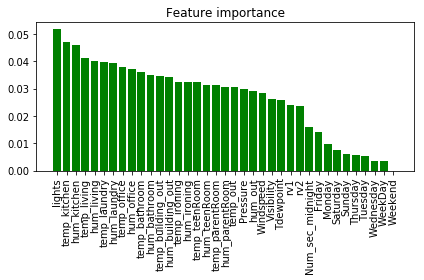

In [202]:
def plotFImp(importance, X_train):
    indices = np.argsort(importance)[::-1]
    plt.bar(range(X_train.shape[1]), importance[indices], color='green', align = 'center')
    plt.title('Feature importance')
    plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
    plt.tight_layout()
    plt.show()

plotFImp(importance, X_train)

# Feature analysis and Importance using RandomForestRegressor

In [204]:
model = RandomForestRegressor(n_estimators=300, n_jobs=4, verbose=2)
model.fit(X_train, y_train)
importance_rf = model.feature_importances_
importance_rf

building tree 1 of 300
building tree 2 of 300building tree 3 of 300

building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    9.3s


building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   42.4s


building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  1.4min finished


array([  4.56508615e-02,   2.74624725e-02,   5.55657484e-02,
         3.91349216e-02,   4.27046739e-02,   4.57189186e-02,
         4.80164965e-02,   3.04155481e-02,   3.18603874e-02,
         2.94722044e-02,   4.94722267e-02,   3.21735251e-02,
         4.12118995e-02,   2.75653354e-02,   3.80001943e-02,
         3.90614926e-02,   4.44635635e-02,   2.54401849e-02,
         3.24387293e-02,   2.40199294e-02,   5.37367484e-02,
         6.16136831e-02,   2.89661947e-02,   2.09273564e-02,
         2.84179038e-02,   1.89147935e-02,   1.83925584e-02,
         1.65809850e-09,   4.85785531e-03,   5.42636083e-03,
         2.65763884e-03,   9.79203255e-04,   1.03417257e-03,
         1.30794767e-03,   1.02367276e-03,   9.65715358e-04,
         9.28879971e-04])

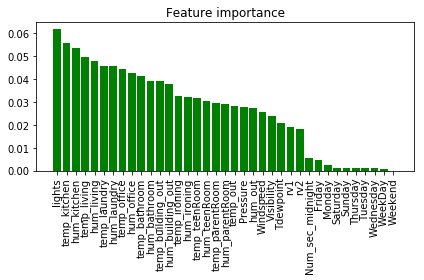

In [205]:
plotFImp(importance_rf, X_train)

# Feature analysis and Importance using GradientBoostingRegressor

In [206]:
model = GradientBoostingRegressor(n_estimators=300, verbose=2)
model.fit(X_train, y_train)
importance_gb = model.feature_importances_
importance_gb

      Iter       Train Loss   Remaining Time 
         1       10506.8772           35.08s
         2       10327.1879           33.61s
         3       10181.4920           32.76s
         4       10055.8456           35.61s
         5        9938.3873           34.02s
         6        9827.3897           32.43s
         7        9741.7947           31.52s
         8        9660.3594           31.44s
         9        9579.6993           29.89s
        10        9503.7650           28.12s
        11        9439.5352           27.98s
        12        9384.3755           27.63s
        13        9301.6787           27.96s
        14        9244.7361           27.39s
        15        9175.8963           27.93s
        16        9127.3416           28.12s
        17        9081.1615           27.79s
        18        9030.3687           27.71s
        19        8987.6262           26.87s
        20        8930.3596           26.56s
        21        8886.2605           26.00s
        2

       184        6091.1939            8.25s
       185        6084.1430            8.19s
       186        6074.4927            8.13s
       187        6062.5857            8.06s
       188        6053.6496            7.98s
       189        6052.1174            7.89s
       190        6040.9341            7.82s
       191        6029.5964            7.74s
       192        6025.3233            7.68s
       193        6022.8173            7.59s
       194        6018.1332            7.52s
       195        6008.1282            7.45s
       196        5995.6944            7.40s
       197        5989.1068            7.34s
       198        5982.8304            7.26s
       199        5980.1390            7.18s
       200        5971.9745            7.10s
       201        5965.9444            7.03s
       202        5958.1030            6.95s
       203        5936.8932            6.89s
       204        5925.1812            6.81s
       205        5915.1549            6.73s
       206

array([  2.19642956e-02,   3.30098381e-02,   5.87787884e-02,
         3.06356143e-02,   5.91861437e-02,   6.60678258e-02,
         5.28952818e-02,   2.94841540e-02,   2.65662805e-02,
         3.11834053e-02,   4.05880649e-02,   4.15735874e-02,
         2.99395476e-02,   3.12058558e-02,   4.48617968e-02,
         4.94572556e-02,   5.46973898e-02,   2.17578608e-02,
         3.25651390e-02,   2.48729894e-02,   7.74599757e-02,
         3.30297846e-02,   2.37367052e-02,   1.18071781e-02,
         3.51144729e-02,   8.42057364e-03,   7.31430666e-03,
         0.00000000e+00,   6.33361510e-03,   7.01999713e-03,
         5.96036529e-03,   0.00000000e+00,   7.93894206e-05,
         6.44156708e-04,   0.00000000e+00,   8.31185613e-05,
         1.70524628e-03])

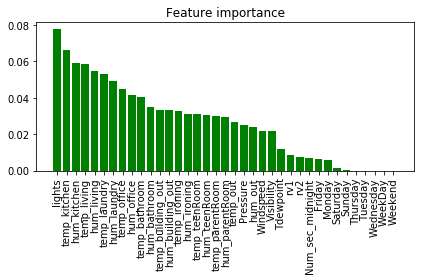

In [207]:
plotFImp(importance_gb, X_train)

# Feature Importance summary

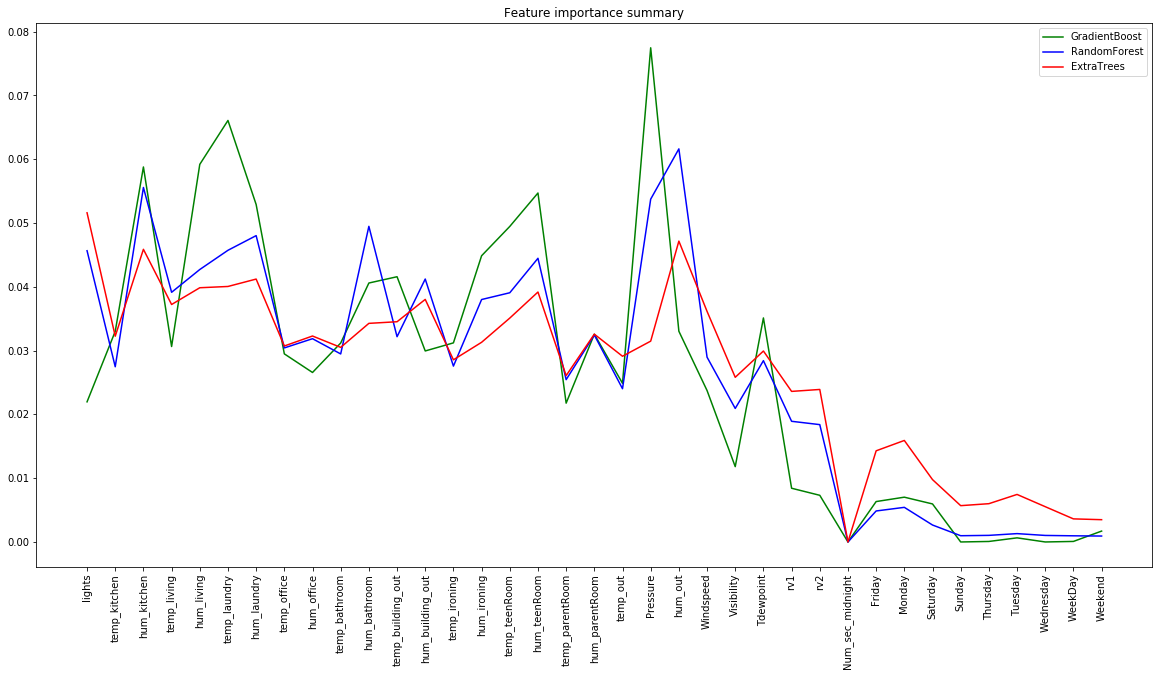

In [222]:
rcParams['figure.figsize'] = 20,10
plt.plot(range(X_train.shape[1]), importance_gb, color='g')
plt.plot(range(X_train.shape[1]), importance_rf, color='b')
plt.plot(range(X_train.shape[1]), importance, color='r')
plt.title('Feature importance summary')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.legend(('GradientBoost', 'RandomForest', 'ExtraTrees'))
plt.show()

In [223]:
centered_scaled_data.to_csv('normalizedData.csv')